# Hypothesis

- People are more likely to shop online after working hours.
- People are more likely to shop during weekends.
- People are more likely to shop in certain months of the year (i.e. Christmas season), each individual countries’ end of year sales, etc.
- Low unit value items are more likely to be a top 5 sales item in each country.


# Data Set Information and Source

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

Source: Dr. Daqing Chen, Course Director: MSc Data Science. chend '@' lsbu.ac.uk, School of Engineering, London South Bank University, London SE1 0AA, UK. 

Link: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

# Data Import and Merging

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint
from citipy import citipy

# Filepath of the CSV files
csv_path_1 ='Resources/Year 2009-2010.csv'
csv_path_2 ='Resources/Year 2010-2011.csv'

# Read through CSV files via Pandas
df1=pd.read_csv(csv_path_1, encoding="ISO-8859-1")
df2=pd.read_csv(csv_path_2, encoding="ISO-8859-1")


# Merge the files
dataset = df1.append([df2])

# Display dataframe
dataset.head()

,ï»¿Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom


# Exploring the Data

In [2]:
# Check out the dataframe using describe and info
dataset.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   ï»¿Invoice   1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 73.3+ MB


In [4]:
dataset.keys()

Index(['ï»¿Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [5]:
dataset.count()

ï»¿Invoice     1067371
StockCode      1067371
Description    1062989
Quantity       1067371
InvoiceDate    1067371
Price          1067371
Customer ID     824364
Country        1067371
dtype: int64


Number of customer IDs being less than invoices means that some people did not register and checked out as a guest.

In [6]:
dataset['ï»¿Invoice'] = dataset['ï»¿Invoice'].astype(str)
dataset['StockCode'] = dataset['StockCode'].astype(str)
dataset['Description'] = dataset['Description'].astype(str)
dataset['InvoiceDate'] = dataset['InvoiceDate'].astype(str)
dataset['Country'] = dataset['Country'].astype(str)

In [7]:
dataset=dataset.rename(columns= {"ï»¿Invoice":"Invoice Number",
                                 "StockCode": "Stock Code",
                                 "InvoiceDate": "Invoice Date",
                                 })

# Refunds-related Data
The following code extracts the refunds-related data from the main dataset for ease of sales analysis.

In [8]:
# Clean dataset and remove returns and refunds
dataset.drop(dataset.loc[dataset['Quantity']<0].index, inplace=True)
dataset.drop(dataset.loc[dataset['Price']<0].index, inplace=True)

# Augmentation of the Data

In [9]:
#This is to split the date and time out as separate date and time
dataset['Dates'] = pd.to_datetime(dataset['Invoice Date']).dt.date
dataset['Hour'] = pd.to_datetime(dataset['Invoice Date']).dt.hour
dataset.head()

,Invoice Number,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID,Country,Dates,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom,2009-01-12,7
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom,2009-01-12,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom,2009-01-12,7


In [10]:
#This is to convert the dates to datetime format and then converting the date to day of the week
dataset['Dates'] = pd.to_datetime(dataset['Dates'])
dataset['Day of Week'] = dataset['Dates'].dt.day_name()
dataset

,Invoice Number,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID,Country,Dates,Hour,Day of Week
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom,2009-01-12,7,Monday
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,7,Monday
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,7,Monday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom,2009-01-12,7,Monday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom,2009-01-12,7,Monday
...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/11 12:50,2.10,12680.0,France,2011-09-12,12,Monday
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/11 12:50,4.15,12680.0,France,2011-09-12,12,Monday
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/11 12:50,4.15,12680.0,France,2011-09-12,12,Monday
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,9/12/11 12:50,4.95,12680.0,France,2011-09-12,12,Monday


Weekend vs. weekdays - Nich

# Shopping trends by month and by year for each country
 Rename suggestion : Volume of Monthly and Annual Orders

In [11]:
# extract year from datetime located in 'Dates' column
dataset['Year'] = pd.DatetimeIndex(dataset['Dates']).year
# extract month from datetime located in 'Dates' column
dataset['Month'] = pd.DatetimeIndex(dataset['Dates']).month
#display dataframe
dataset

,Invoice Number,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID,Country,Dates,Hour,Day of Week,Year,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom,2009-01-12,7,Monday,2009,1
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,7,Monday,2009,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,7,Monday,2009,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom,2009-01-12,7,Monday,2009,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom,2009-01-12,7,Monday,2009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/11 12:50,2.10,12680.0,France,2011-09-12,12,Monday,2011,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/11 12:50,4.15,12680.0,France,2011-09-12,12,Monday,2011,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/11 12:50,4.15,12680.0,France,2011-09-12,12,Monday,2011,9
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,9/12/11 12:50,4.95,12680.0,France,2011-09-12,12,Monday,2011,9


In [12]:
# Note: Had an issue with re-ordering xlabels in the bar chart after running this code
# It was easier to convert month number to month name using xticks
# Replace and convert month number with month name in 'Month'column
#dataset['Month']= dataset['Month'].replace([1,2,3,4,5,6,7,8,9,10,11,12],['January','February','March','April','May','June','July','August','September','October','November','December'])
#dataset

In [13]:
# Number of products in the online store
dataset['Description'].nunique()

5469

In [14]:
# To display required columns, assign the columns to a list variable 
# and pass that variable to the indexing operator 
columns=['Invoice Number','Year', 'Month']
dataset_v1 = dataset[columns]
dataset_v1

,Invoice Number,Year,Month
0,489434,2009,1
1,489434,2009,1
2,489434,2009,1
3,489434,2009,1
4,489434,2009,1
...,...,...,...
541905,581587,2011,9
541906,581587,2011,9
541907,581587,2011,9
541908,581587,2011,9


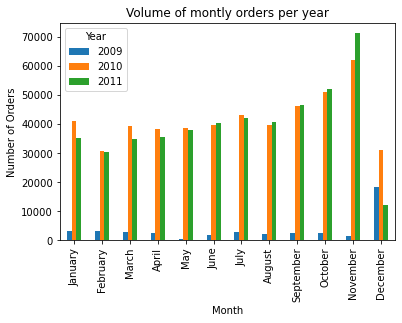

In [15]:
# Use groupby to find out total orders per month and year
# Count the orders by month, spliting by year
# Display the result in a bar plot using the calculated two-level groupby
grouped_data=dataset_v1.groupby(['Month', 'Year']).size().unstack().plot(kind='bar',stacked=False)
# Rotate the x-labels by 30 degrees, and keep the text aligned horizontally
positions = (0,1,2,3,4,5,6,7,8,9,10,11)
labels = ('January','February','March','April','May','June','July','August','September','October','November','December')
plt.xticks(positions, labels)
plt.title("Volume of montly orders per year")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

Above chart shows the number variance of annual orders by month.
Fluctuations in the annual values could be caused by a variety of factors such as successful marketing campaigns (i.e. increase in marketing activities), expanding the market, improving customer service, etc.

In [16]:
# Create a new version of dataset to find out reasons of increased sales
dataset_v2=dataset.loc[dataset['Year']==2009]
# Number of countries in the market in year 2009
countries_2009=dataset_v2['Country'].nunique()
print(f'Number of countries in year 2009 is {countries_2009}.')

Number of countries in year 2009 is 22.


In [17]:
# Create a new version of dataset to find out reasons of increased sales
dataset_v3=dataset.loc[dataset['Year']==2010]
# Number of countries in the market in year 2010
countries_2010=dataset_v3['Country'].nunique()
print(f'Number of countries in year 2010 is {countries_2010}.')

Number of countries in year 2010 is 40.


In [18]:
# Create a new version of dataset to find out reasons of increased sales
dataset_v4=dataset.loc[dataset['Year']==2011]
# Number of countries in the market in year 2011
countries_2011=dataset_v3['Country'].nunique()
print(f'Number of countries in year 2011 is {countries_2011}.')

Number of countries in year 2011 is 40.


Above calculations shows that one of the reasons for the increased volume of sales in 2010 vs. 2009 could be the increase in the countries.

# Annual increase/decrease - Zach

# Customer with highest purchase quantity and $ amount - Zach

# Most popular item by country and overall - Miley

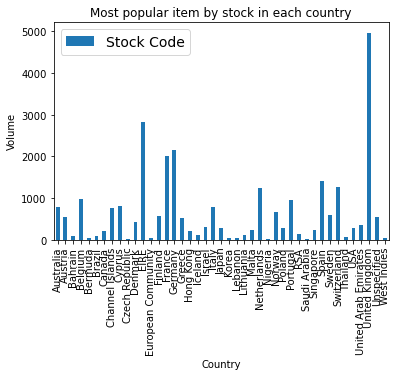

In [19]:
item_ID_df = dataset.groupby("Country").nunique()["Stock Code"]
item_ID = item_ID_df.plot.bar(title= "Most popular item by stock in each country")

item_ID.set_xlabel("Country")
item_ID.set_ylabel("Volume")
plt.legend(fontsize = 14)
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

In [20]:
stock_id = dataset.groupby("Stock Code")
count_stock = stock_id["Stock Code"].count()
count_stock

Stock Code
10002           386
10002R            3
10080            31
10109             1
10120            77
               ... 
gift_0001_60      2
gift_0001_70      3
gift_0001_80      3
gift_0001_90      2
m                 5
Name: Stock Code, Length: 4979, dtype: int64

In [21]:
dataset.head()

,Invoice Number,Stock Code,Description,Quantity,Invoice Date,Price,Customer ID,Country,Dates,Hour,Day of Week,Year,Month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,1/12/09 07:45,6.95,13085.0,United Kingdom,2009-01-12,7,Monday,2009,1
1,489434,79323P,PINK CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,7,Monday,2009,1
2,489434,79323W,WHITE CHERRY LIGHTS,12,1/12/09 07:45,6.75,13085.0,United Kingdom,2009-01-12,7,Monday,2009,1
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,1/12/09 07:45,2.10,13085.0,United Kingdom,2009-01-12,7,Monday,2009,1
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1/12/09 07:45,1.25,13085.0,United Kingdom,2009-01-12,7,Monday,2009,1


In [22]:
item_ID_df = dataset.groupby(["Stock Code"])
sum_item = item_ID_df.sum()
sum_item.head()

,Quantity,Price,Customer ID,Hour,Year,Month
Stock Code,,,,,,
10002,8765,380.45,4696667.0,4952,775879,2422
10002R,4,15.40,0.0,48,6028,15
10080,597,14.14,430314.0,387,62331,216
10109,4,0.42,14159.0,12,2009,3
10120,680,18.37,1058585.0,1020,154784,551


In [23]:
item_ID_df = dataset.groupby(["Country"])
sum_item = item_ID_df.sum()
sum_item.head(43)

,Quantity,Price,Customer ID,Hour,Year,Month
Country,,,,,,
Australia,104094,6.389820e+03,2.220790e+07,20694,3584952,11773
Austria,11341,3.875800e+03,1.133884e+07,10793,1823411,6999
Bahrain,1157,4.050300e+02,6.794770e+05,1402,233177,658
Belgium,34506,1.267410e+04,3.725950e+07,36654,6017809,20739
Bermuda,2798,8.470000e+01,0.000000e+00,340,68340,102
Brazil,545,2.563100e+02,1.199170e+06,1064,188972,686
Canada,3657,1.058090e+03,3.800513e+06,2745,458431,1986
Channel Islands,21033,7.221540e+03,2.304028e+07,17960,3122216,10657
Cyprus,10586,5.841520e+03,1.413591e+07,13186,2287724,8698


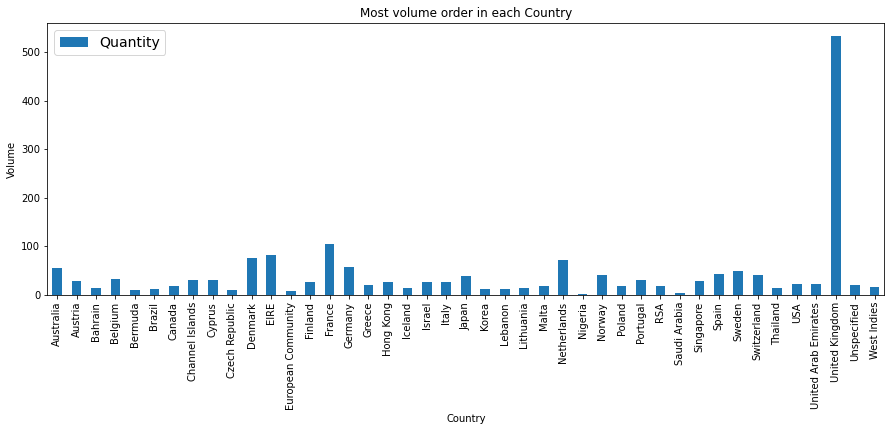

In [24]:
item_ID_df = dataset.groupby("Country").nunique()["Quantity"]
item_ID = item_ID_df.plot.bar(title= "Most volume order in each Country")

item_ID.set_xlabel("Country")
item_ID.set_ylabel("Volume")
plt.legend(fontsize = 14)
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

# Time of the day with highest sale volume - Samra

Text(0.5, 1.0, 'Purchases Made per Hour')

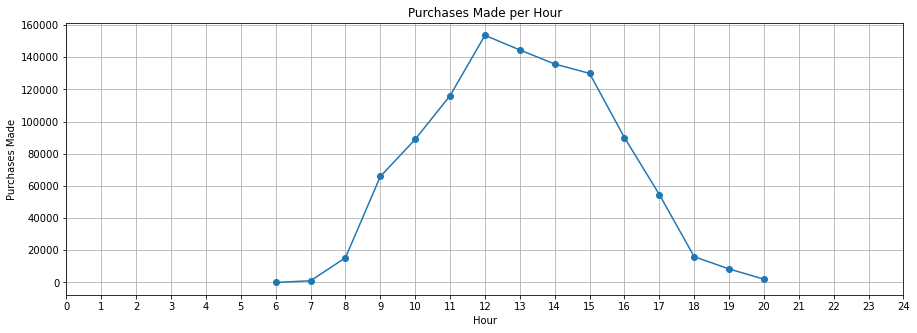

In [25]:
ax = dataset.Hour.value_counts().sort_index().plot(marker='o')
ax.set_xlabel("Hour")
ax.set_ylabel("Purchases Made")
ax.grid()
ax.set_xticks(range(0,25))
ax.set_title("Purchases Made per Hour")

Whether people are more likely to shop online during a certain time of the day or weekdays/weekends.

Whether people are more likely to shop in certain months of the year (i.e. Christmas season), each individual countries’ end of year sales, etc.

Whether low unit value items are more likely to be a top 5 sales item in each country.